<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-количественных-переменных" data-toc-modified-id="Подготовка-количественных-переменных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка количественных переменных</a></span></li><li><span><a href="#Подготовка-качественных-переменных" data-toc-modified-id="Подготовка-качественных-переменных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка качественных переменных</a></span></li><li><span><a href="#Экстрагирование-новых-переменных" data-toc-modified-id="Экстрагирование-новых-переменных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Экстрагирование новых переменных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-перед-обучением-моделей" data-toc-modified-id="Подготовка-данных-перед-обучением-моделей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных перед обучением моделей</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Определение стоимости автомобилей

**Цель**

* Построить модель для предсказания стоимости б/у автомобиля. 

* Метрика оценки качества модели - `RMSE`. 
* Важные параметры, которые необходимо учесть: качество предсказания, скорость обучения и предсказания модели.


**Описание данных**

Исторические данные, которые включают технические характеристики автомобиля, активность клиентов на сайте продажи машин и цены каждой машины.

*Features*
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л.с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* NotRepaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя

*Target*

* Price — цена (евро)


## Подготовка данных

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
pd.options.mode.chained_assignment = None

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score


import optuna

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn import linear_model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import lightgbm as lgb
from catboost import CatBoostRegressor, Pool, metrics, cv

import warnings 
warnings.filterwarnings('ignore')

In [13]:
# Импорируем таблицу
path = '/datasets/autos.csv'
path2 = r'D:/Yandex/autos.csv'
list_of_pathes = [path, path2]

autos = [pd.read_csv(path, parse_dates=['DateCrawled', 'DateCreated', 'LastSeen']) for path in list_of_pathes if os.path.exists(path)][0]

In [14]:
#Функция получения информации о таблице
def df_info(df):
    display(df.head())
    print()
    print('Объем таблицы', df.shape)
    print()
    print('Информация о таблице', df.info())
    print()
    print('Пропуски')
    a = pd.Series(df.isna().sum()/len(df))*100
    print(a)
    
    print()
    print('Количество пропусков:')
    b = pd.Series(df.isna().sum())
    print(b)
    
    print()
    print('Дубликаты', df.duplicated().sum())
    print()
    display(df.describe())

In [15]:
df_info(autos)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21



Объем таблицы (354369, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  NotRepaired        283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPicture

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


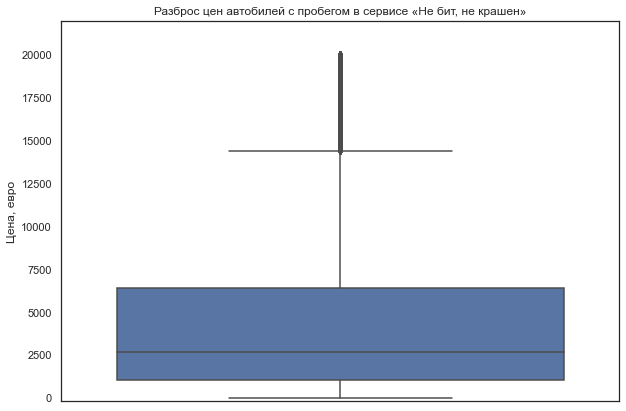

In [16]:
# Распределение цен и поиск выбросов
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('white')
plt.ylim(-200, 22000, 100)
sns.boxplot(y=autos['Price'])

plt.ylabel('Цена, евро')
plt.figsize=(16,8)

plt.title('Разброс цен автобилей с пробегом в сервисе «Не бит, не крашен»')
plt.show()

In [17]:
# Посчитаем верхнюю планку выбросов
Q1 = autos['Price'].quantile(0.25)
Q3 = autos['Price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5

upper_whisker = Q3 + (whisker_width*IQR)
lower_whisker = Q3 - (whisker_width*IQR)
print("Верхняя граница выбросов:", upper_whisker, 'Нижняя граница выбросов:', lower_whisker, sep='\n')


Верхняя граница выбросов:
14425.0
Нижняя граница выбросов:
-1625.0


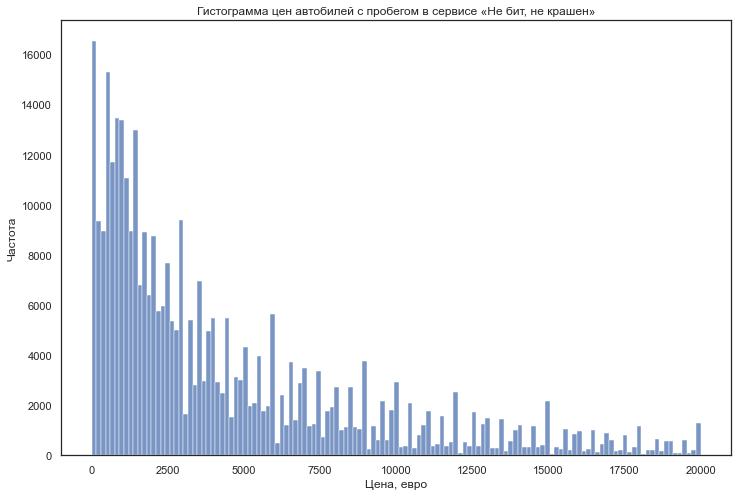

In [18]:
# Распределение цен
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')
sns.histplot(x=autos['Price'], data='autos')
plt.xlabel('Цена, евро')
plt.ylabel('Частота')
plt.figsize=(16,8)
plt.title('Гистограмма цен автобилей с пробегом в сервисе «Не бит, не крашен»')
plt.show()

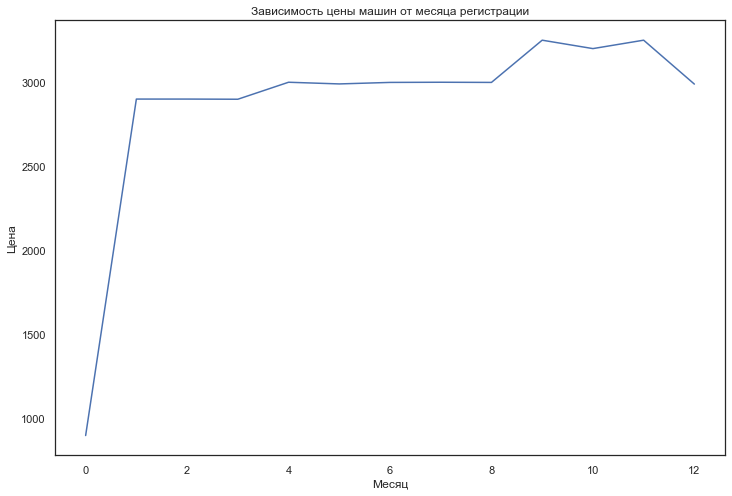

In [19]:
# Связь цены автомобилей от месяца регистрации
autos.groupby('RegistrationMonth')['Price'].median().plot()
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.title('Зависимость цены машин от месяца регистрации')
plt.show()

* На графике видно, что в колонке месяц регистрации есть 13 месяцев и что цены в целом не меняются от месяца. Зато во время нулевого месяца была наименьшая цена. 
* Посмотрим на количество строк с 0 месяцем.


In [20]:
# Проверим количество строк и процент строк с нулевым месяцем
print('Количество строк с нулевым месяцем:',autos.query('RegistrationMonth==0')['RegistrationMonth'].count())
print('Процент строк с нулевым месяцем:', 
      round((autos.query('RegistrationMonth==0')['RegistrationMonth'].count())/len(autos)*100), '%')

Количество строк с нулевым месяцем: 37352
Процент строк с нулевым месяцем: 11 %


* 11% строк содержат информацию о нулевом месяце.
* Возможно это были пропуски в колонке, которые были заменены на нулевой месяц. Поэтому лучше объединить эти значения с первым месяцем.

In [21]:
autos.loc[autos['RegistrationMonth']==0, 'RegistrationMonth'] = 1
np.sort(autos['RegistrationMonth'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

* Проверим цены по месяцам с 12 месяцами.

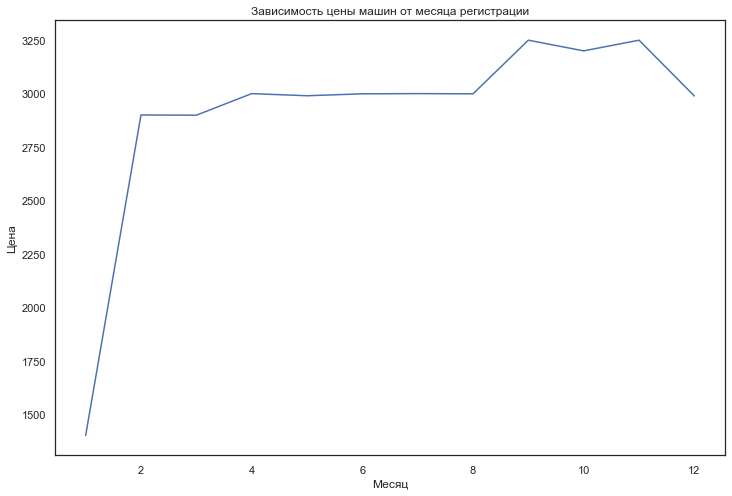

In [22]:
# Связь цены автомобилей от месяца
autos.groupby('RegistrationMonth')['Price'].median().plot()
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.title('Зависимость цены машин от месяца регистрации')

plt.show()

* Цены за 1 месяц теперь существенно снизились за счёт объединения с нулевым месяцем. 
* Значит фактор месяц, скорее всего, будет значимым при предсказании цены.

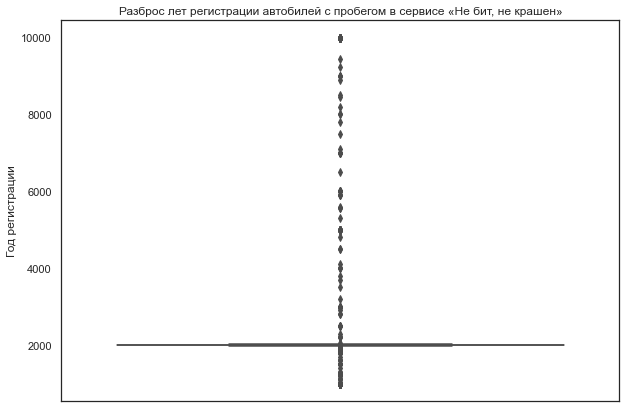

In [23]:
# Распределение года регистрации автомобилей и поиск выбросов
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('white')
sns.boxplot(y=autos['RegistrationYear'])

plt.ylabel('Год регистрации')
plt.figsize=(16,8)

plt.title('Разброс лет регистрации автобилей с пробегом в сервисе «Не бит, не крашен»')
plt.show()

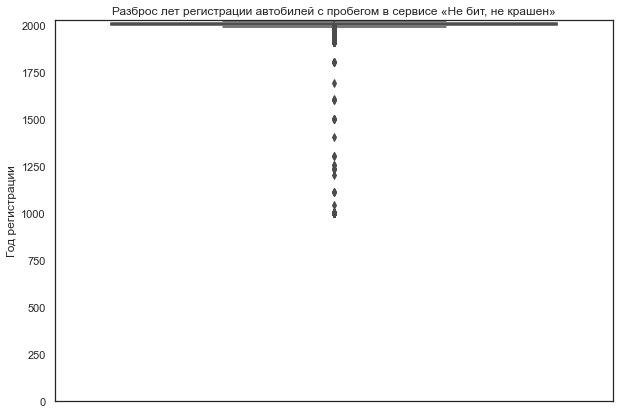

In [24]:
# Распределение года регистрации автомобилей и поиск выбросов
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('white')
plt.ylim(0, 2023)
sns.boxplot(y=autos.query('RegistrationYear<10000')['RegistrationYear'])

plt.ylabel('Год регистрации')
plt.figsize=(16,8)

plt.title('Разброс лет регистрации автобилей с пробегом в сервисе «Не бит, не крашен»')
plt.show()

In [25]:
# Посчитаем верхнюю планку выбросов
Q1 = autos['RegistrationYear'].quantile(0.25)
Q3 = autos['RegistrationYear'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5

upper_whisker_year = Q3 + (whisker_width*IQR)
lower_whisker_year = Q3 - (whisker_width*IQR)
print("Нижняя граница выбросов:", lower_whisker_year, "Верхняя граница выбросов:", upper_whisker_year)

Нижняя граница выбросов: 1994.5 Верхняя граница выбросов: 2021.5


### Подготовка количественных переменных

* Целевой отклик `Price` не имеет нормального распределения. В колонке есть нулевые значения. Возможно машины были проданы задаром. Есть выбросы, т.к. 75% данных сосредоточены в районе 1050-6400 евро. Однако есть целый ряд значений выше верхней границы выбросов (14425 евро). Тем не менее, цены ровно снижаются к своему максимуму. Нужно будет перепроверить выбросы, т.к. заявленная метрика `RMSE` чувствительна к выбросам.
* В колонке `RegistrationYear` есть выбросы максимальных значений 9999 годом и 1000 годом. Возможно это пропуски или ошибки. Нужно будет заменить эти значения или удалить. Определим количество выбросов по границам выбросов.
* В колонке `RegistrationMonth` были данные за 13 месяцев и нулевой месяц, который содержал 11 тыс строк и содержал выбивающиеся от остальных 12 месяцев данные, со схожим диапазоном цен. Было принято решение объединить эти строки с первым месяцем. 
* В колонке `Power` есть значения 0 и 20000, в то время как 25-75% данных лежат в пределах 69-143. Нужно будет посмотреть на количество таких выбросов и при необходимости удалить эти строки или заменить на медианные значения.
* Из описания заметно, что колонка `NumberOfPictures` содержит только нулевое значение во всей ячейках. За не имением возможности проверить информацию по этой колонке, принято решение удалить колонку из данных.

In [26]:
# Удалим колонку 'NumberOfPictures' из таблицы
autos.drop('NumberOfPictures', axis=1, inplace=True)

In [27]:
# Проверим удалилась ли колонка
autos.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'PostalCode', 'LastSeen'],
      dtype='object')

* Колонка `Number_Of_Pictures` удалена из таблицы.

In [28]:
# Заменим названия колонок
autos.columns = autos.columns.str.replace( r"([A-Z])", r" \1").str.strip().str.replace(' ', '_').str.lower()
autos.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'not_repaired', 'date_created', 'postal_code', 'last_seen'],
      dtype='object')

In [29]:
# Удалим дубликаты
autos = autos.drop_duplicates()
autos.shape

(354365, 15)

In [30]:
# Проверим количество нулевых значений цены
autos.query('price==0')['price'].count()

10772

* Нулевых значений более 10 тыс, значит это не выбросы, а продажи даром.
* Проверим высокие цены.


In [31]:
# Удалим строки с нулевыми значениями в цене
autos = autos.query('price!=0')
autos.shape

(343593, 15)

* Строки с нулевыми значениями цен удалены из выборки.

In [32]:
# Проверим количество выбросов цен выше upper_whisker
autos.query('price > @upper_whisker')['price'].count()

18979

In [33]:
# Проверим процент выбросов цен выше upper_whisker
print(round((autos.query('price > @upper_whisker')['price'].count())/len(autos)*100, 2), "%")

5.52 %


* Высоких значений выше планки выбросов составляет 5,52%, что также сложно назвать ошибкой.
* Тем не менее, можно посмотреть на эти машины.

In [34]:
# Распределение завышенных (выше границы выбросов) и "нормальных" цен среди брендов
data=[autos.query('price <= @upper_whisker')['brand'].value_counts(),
      autos.query('price > @upper_whisker')['brand'].value_counts()]
pd.DataFrame(data, index=['price =< upper_whisker', 'price > upper_whisker']).T

,price =< upper_whisker,price > upper_whisker
volkswagen,70469.0,3943.0
opel,37992.0,538.0
bmw,32362.0,3447.0
mercedes_benz,28336.0,3021.0
audi,25413.0,3161.0
ford,23672.0,785.0
renault,17212.0,177.0
peugeot,10604.0,177.0
fiat,9261.0,71.0
seat,6493.0,225.0


* Как видно из сравнительной таблицы - все бренды представлены как в завышенном, так и "стандартном" ценовом диапазоне.
* В колонке с завышенными ценами отсутствуют значения только для машин из низшей ценовой категории, как lada и daewoo, что соответствует действительности.

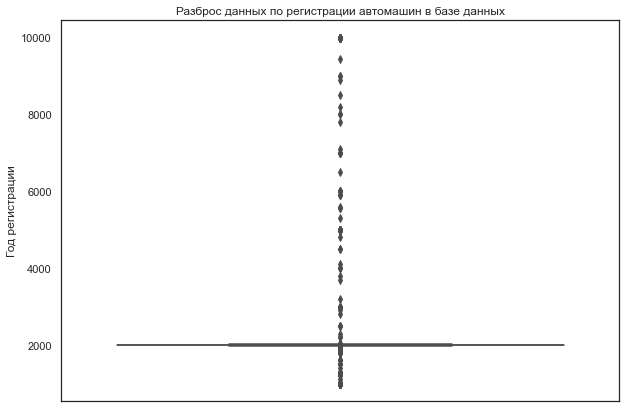

In [35]:
# Распределение цен и поиск выбросов
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('white')
sns.boxplot(y=autos['registration_year'])

plt.ylabel('Год регистрации')
plt.figsize=(16,8)

plt.title('Разброс данных по регистрации автомашин в базе данных')
plt.show()

* Значения в колонке `registration_year` изменяются в диапазоне далекого прошлого и далекого будущего.
* Проверим уникальные значения года в колонках дат `date_crawled` и `date_created` и **найдем верхнюю границу** регистрации, т.к. регистрация машины не может быть позже выгрузки и создания анкеты на сайте.


In [36]:
# Проверим уникальные значения года в колонке date_created
(pd.DatetimeIndex(autos['date_created']).year).unique()

Int64Index([2016, 2015, 2014], dtype='int64', name='date_created')

In [37]:
# Проверим уникальные значения года в колонке date_created
(pd.DatetimeIndex(autos['date_crawled']).year).unique()

Int64Index([2016], dtype='int64', name='date_crawled')

* В обоих колонках даты `date_crawled` и `date_created` ограничены 2015 и 2016 годом. 
* Значит все значения регистраций машин выходящие за эти пределы могут считаться недействительными. 
* Извлечем значение года из колонок `date_crawled` и `date_created` и посчитаем разницу между этими колонками и `registration_year`.

In [38]:
# Создадим новые колонки со значением года создания анкеты и выгрузки анкеты
autos['date_created_year'] = pd.DatetimeIndex(autos['date_created']).year
autos['date_crawled_year'] = pd.DatetimeIndex(autos['date_crawled']).year

In [39]:
# Создадим колонку с разницей между датой скачивания анкеты из базы и регистрацией автомобиля
autos['date_crawled_year_minus_registration_year'] = autos['date_crawled_year'] - autos['registration_year']

# Создадим колонку с разницей между датой дата создания анкеты и регистрацией автомобиля
autos['date_created_year_minus_registration_year'] = autos['date_created_year'] - autos['registration_year']

In [40]:
# Посчитаем количество отрицательных значений по date_crawled_year для дат регистраций машин из "будущего"
autos.query('date_crawled_year_minus_registration_year<0')['date_crawled_year_minus_registration_year'].count()

13779

In [41]:
# Посчитаем количество отрицательных значений по date_created_year для дат регистраций машин из "будущего"
autos.query('date_created_year_minus_registration_year<0')['date_created_year_minus_registration_year'].count()

13779

* В таблице присутствует 13779 строк с датами регистраций машин после взаимодействия пользователей на сайте с анкетами.
* Таким образом, верхняя граница даты регистрации машины определена и эти строки можно удалить.

In [42]:
# Удалим строки по верхней границе регистрации машины
autos = autos.query('date_created_year_minus_registration_year>=0')
autos.shape

(329814, 19)

* Из таблицы удалены 13779 строки, где регистрация машин превышала значения даты создания пользователем анкеты на сайте.
* Определим теперь нижнюю границу даты регистрации.

In [43]:
# Количество строк со значениями меньше нижней границы выбросов
autos.query('registration_year < @lower_whisker_year')['registration_year'].count()

24727

* Таблица содержит значительное количество строк *`registration_year`* раньше 1994 года (`lower_whisker_year`), что указывает на то, что среди них есть незначильная часть выбросов.
* Посмотрим на распределение дат ниже 1994 года.

<AxesSubplot:>

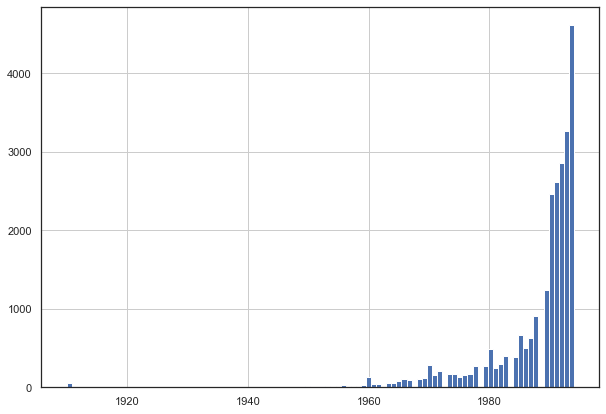

In [44]:
# Посмотрим на диапазон регистрации машин, начиная с их создания:) до нижней границы выбросов
(autos
 .query('registration_year < @lower_whisker_year and registration_year> 1886')['registration_year']
 .hist(bins=100)
)

In [45]:
# Посчитаем количество выбросов ранее 1959 года.
(autos
 .query('registration_year < 1959')['registration_year'].count()
)

310

* Основной диапазон идет с 1960 года. Значит, обнаруженые 310 строк является выбросами и их следует удалить из таблицы.

In [46]:
autos = autos.query('registration_year > 1959')
autos.shape

(329474, 19)

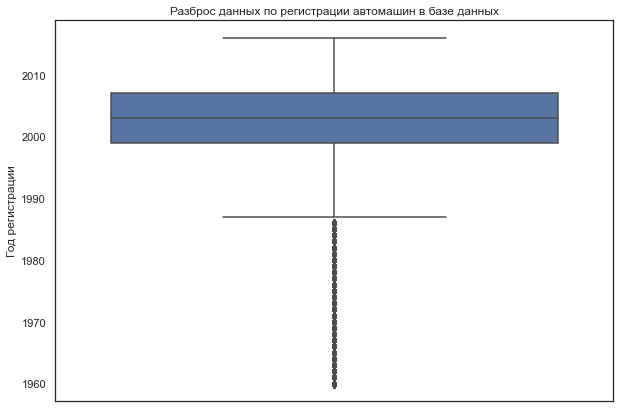

In [47]:
# Распределение цен и поиск выбросов
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('white')
sns.boxplot(y=autos['registration_year'])

plt.ylabel('Год регистрации')
plt.figsize=(16,8)

plt.title('Разброс данных по регистрации автомашин в базе данных')
plt.show()

In [48]:
autos['registration_year'].describe()

count    329474.000000
mean       2002.646443
std           6.674568
min        1960.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: registration_year, dtype: float64

* Часть выбросов сохранена, однако проверим на общем графике цену в динамике. 

In [49]:
price_year = autos.groupby(['registration_year'])['price'].median().reset_index()
price_year.head()

,registration_year,price
0,1960,3100.0
1,1961,7850.0
2,1962,7299.5
3,1963,7800.0
4,1964,6633.0


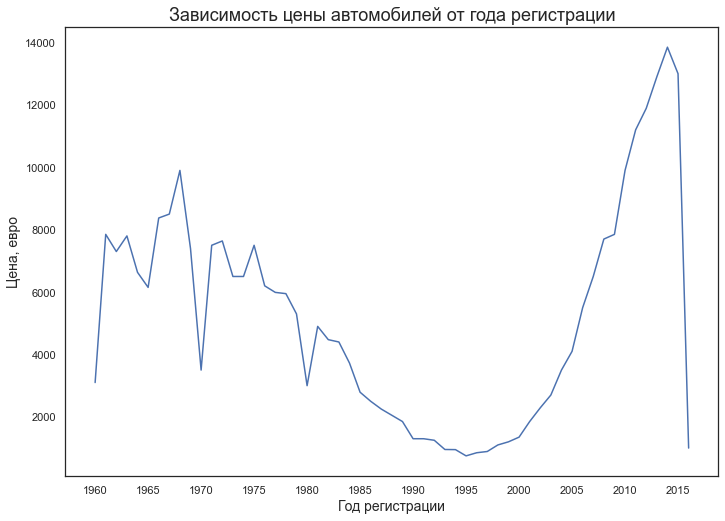

In [77]:
# Связь цены и года регистрации
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.lineplot(x=price_year['registration_year'], y=price_year['price'], color='b')
plt.xticks(np.arange(1960, 2016, step=5))
plt.title('Зависимость цены автомобилей от года регистрации', fontsize=18)
plt.xlabel('Год регистрации', fontsize=14)
plt.ylabel('Цена, евро', fontsize=14)
plt.show()

* Цены за 2016 год резко падают, возможно из-за внеших причин.
* Из таблицы удалены строки с выбросами по дате регистрации. Видно, что цена изменяется нелинейно. Самые дорогие машины - это более новые машины, затем идут старые машины до 1975 года, а после виден провал цен в диапазоне от 1980-2000 гг и снова падение после 2016 года.
* Проверим аномалии в колонке `power`.
* Согласно заметки из интернета, максимальные значения лошадиных сил находятся в пределах 400 л.с.
https://www.autolist.com/guides/average-car-horsepower

In [654]:
# Далее проверим количество аномальных значений двигателей более 400 л.с.
autos.query('power > 400')['power'].count()

656

In [655]:
# Посмотрим на машины с такой мощностью, вдруг среди них будут гоночные
autos.query('power > 400')

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen,date_created_year,date_crawled_year,date_crawled_year_minus_registration_year,date_created_year_minus_registration_year
1816,2016-03-22 20:52:00,3200,small,2004,manual,1398,corolla,5000,6,petrol,toyota,no,2016-03-22,22043,2016-03-22 21:43:26,2016,2016,12,12
2781,2016-03-16 00:37:16,19500,suv,2004,auto,450,cayenne,125000,12,petrol,porsche,no,2016-03-16,38448,2016-04-01 22:47:31,2016,2016,12,12
3289,2016-03-10 17:46:47,16899,wagon,2003,auto,476,e_klasse,150000,9,petrol,mercedes_benz,no,2016-03-10,44319,2016-04-03 18:47:41,2016,2016,13,13
4060,2016-04-03 20:31:00,3100,sedan,2005,manual,953,colt,150000,4,gasoline,mitsubishi,no,2016-04-03,60326,2016-04-07 14:56:46,2016,2016,11,11
4681,2016-03-25 17:57:37,13900,sedan,2006,auto,476,e_klasse,150000,5,petrol,mercedes_benz,no,2016-03-25,52078,2016-04-06 23:17:21,2016,2016,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352322,2016-03-29 18:06:23,15999,wagon,2007,auto,435,other,150000,2,petrol,audi,no,2016-03-29,65510,2016-04-06 05:46:42,2016,2016,9,9
353633,2016-03-23 23:55:21,2400,sedan,2007,manual,650,c2,150000,8,petrol,citroen,NaN,2016-03-23,45277,2016-03-27 01:15:17,2016,2016,9,9
354045,2016-03-22 20:48:48,20000,coupe,2006,auto,476,other,125000,7,petrol,mercedes_benz,no,2016-03-22,38118,2016-03-24 05:16:02,2016,2016,10,10
354260,2016-03-09 17:59:03,399,other,1994,NaN,1103,3er,150000,1,NaN,bmw,NaN,2016-03-09,56235,2016-03-17 09:17:08,2016,2016,22,22


* Есть porsche и mercedes_benz, у которых количество л.с. соответствут значениям из интернета.
https://www.caranddriver.com/porsche/cayenne
https://www.motortrend.com/news/2022-mercedes-benz-eqs-ev-power-range-charging-details/
* Значит поставим планку в 500 л.с. и всех остальных посчитаем за аномалии.

In [656]:
autos = autos.query('power < 500')
autos.shape

(329050, 19)

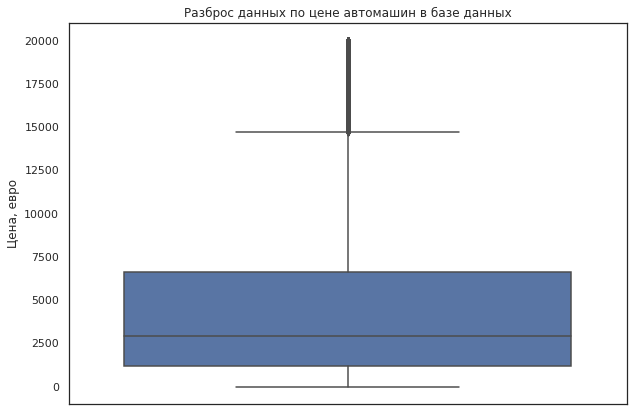

In [657]:
# Распределение цен и поиск выбросов
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('white')
sns.boxplot(y=autos['price'])

plt.ylabel('Цена, евро')
plt.figsize=(16,8)

plt.title('Разброс данных по цене автомашин в базе данных')
plt.show()

* Построим график зависимости цен автомобилей от мощности двигателя.

Text(0.5, 1.0, 'Зависимость цены автомобилей от мощности двигателя')

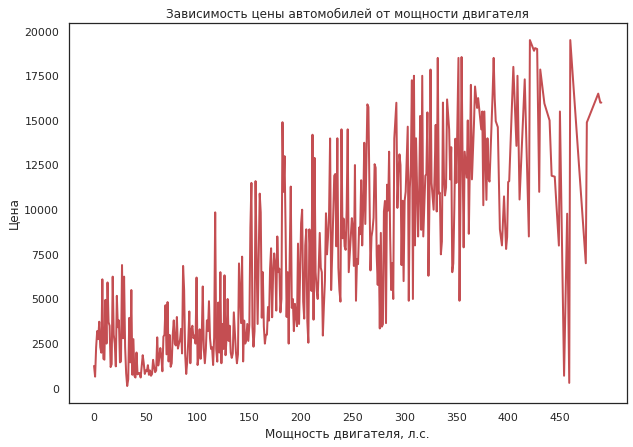

In [658]:
# Связь цены и мощности двигателя
autos.groupby(['power'])['price'].median().plot(linewidth=2, color='r')
plt.ylabel('Цена')
plt.xlabel('Мощность двигателя, л.с.')
plt.xticks(np.arange(0,500,step=50))
plt.title('Зависимость цены автомобилей от мощности двигателя')

* На графике видно, что цена растёт линейно от мощности двигателя машины. 
* Заметен выброс в районе 450 л.с., где цена резко снижается.
* Предлагаю удалить этот выброс.

Text(0.5, 1.0, 'Зависимость цены автомобилей от мощности двигателя')

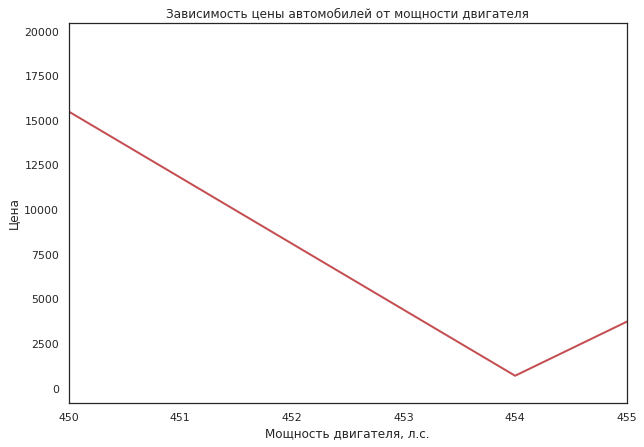

In [659]:
# Поиск выброса цены на мощности двигателя около 450-455
autos.groupby(['power'])['price'].median().plot(linewidth=2, color='r')
plt.ylabel('Цена')
plt.xlabel('Мощность двигателя, л.с.')
plt.xlim(450, 455)

plt.title('Зависимость цены автомобилей от мощности двигателя')

In [660]:
# Посмотрим сколько значений соответствует выбросу в районе 454 л.с.
autos.query('power==454')['power'].count()

1

In [661]:
# Удалим строку с выбросом в районе 454 л.с.
autos = autos.query('power!=454')
autos.shape

(329049, 19)

Text(0.5, 1.0, 'Зависимость цены автомобилей от мощности двигателя')

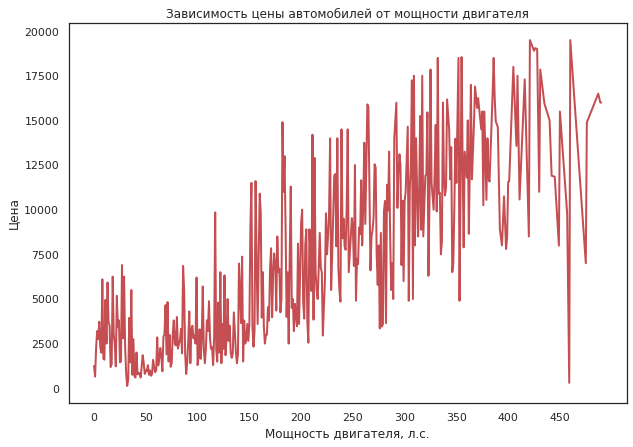

In [662]:
# Связь цены и мощности двигателя
autos.groupby(['power'])['price'].median().plot(linewidth=2, color='r')
plt.ylabel('Цена')
plt.xlabel('Мощность двигателя, л.с.')
plt.xticks(np.arange(0,500,step=50))
plt.title('Зависимость цены автомобилей от мощности двигателя')

* Теперь таблица не имеет явных выбросов по мощности двигателя.

* Удалим лишние колонки, которые не понадобятся для последующего анализа.
* В том числе удалим колонку `postal_code`, которая содержит 8 тыс уникальных значений и является качественной переменной. Использование этой колонки усложнит построение модели.

In [663]:
autos = autos.drop(columns=['postal_code', 'date_created_year',
       'date_crawled_year', 'date_crawled_year_minus_registration_year',
       'date_created_year_minus_registration_year'], axis=1)
autos.shape

(329049, 14)

In [664]:
# Проверим аномалии на описательной таблице
autos.describe()

,price,registration_year,power,kilometer,registration_month
count,329049.000000,329049.000000,329049.000000,329049.000000,329049.000000
mean,4603.572778,2002.647040,108.486994,128266.914654,5.910153
std,4541.528188,6.674384,62.188892,37446.245842,3.546334
min,1.000000,1960.000000,0.000000,5000.000000,1.000000
25%,1200.000000,1999.000000,71.000000,125000.000000,3.000000
50%,2900.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6600.000000,2007.000000,143.000000,150000.000000,9.000000
max,20000.000000,2016.000000,490.000000,150000.000000,12.000000


* Стандартное отклонение колонки `Price` увеличилось с 4514.16 до 4601.64 евро, что закономерно при удалении строк с пропусками. 
* Однако изменение не радикальное.

<AxesSubplot:>

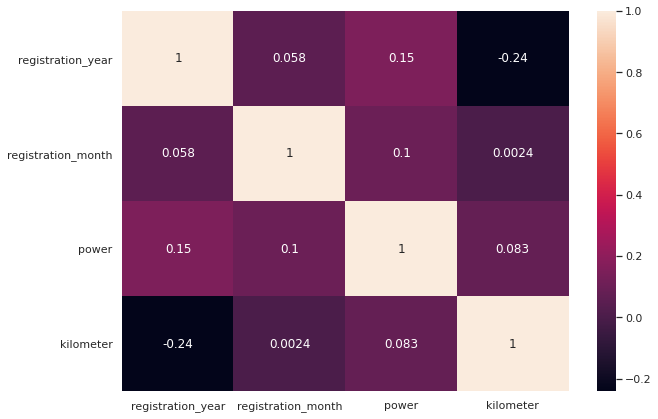

In [665]:
# Посмотроим корреляции между ценой и количественными переменными.
numeric_features = ['registration_year', 'registration_month', 'power', 'kilometer']

sns.heatmap(autos[numeric_features].corr(), annot=True)

* Год регистрации и мощность двигателя имеют среднюю положительную связь с ценой автомобиля.
* В то время как, километраж имеет слабую отрицательную корреляцию с ценой.
* Месяц регистрации не коррелирует с другими фичами.
* Все три показателя соответствуют реальности, значит анализ проходит в верном направлении:)

* Как видно, теперь количественные переменные соответствуют действительности, все аномалии удалены.
* **Минимальная цена теперь составляет 1 евро...**
* Посмотрим на категориальные значения.

### Подготовка качественных переменных

In [666]:
# Проверим пропуски в таблице
autos.isna().sum()

date_crawled              0
price                     0
vehicle_type          19862
registration_year         0
gearbox               15496
power                     0
model                 15474
kilometer                 0
registration_month        0
fuel_type             24033
brand                     0
not_repaired          59620
date_created              0
last_seen                 0
dtype: int64

* Количество пропусков существенно уменьшилось.
* Посмотрим на уникальные значения в колонках с качественными переменными.

In [667]:
# Посмотрим на категориальные переменные - пропуски и встречаемые значения
categorical = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand',
       'not_repaired']
for i in categorical:
    print(i,  autos[i].value_counts(), sep='\n', end='\n, \n')

vehicle_type
sedan          89184
small          77898
wagon          63612
bus            28311
convertible    19825
coupe          15580
suv            11742
other           3035
Name: vehicle_type, dtype: int64
, 
gearbox
manual    250706
auto       62847
Name: gearbox, dtype: int64
, 
model
golf                  26710
other                 23014
3er                   18654
polo                  12016
corsa                 11579
                      ...  
kalina                    6
rangerover                3
serie_3                   3
range_rover_evoque        2
serie_1                   1
Name: model, Length: 250, dtype: int64
, 
fuel_type
petrol      204236
gasoline     94764
lpg           5018
cng            531
hybrid         220
other          161
electric        86
Name: fuel_type, dtype: int64
, 
brand
volkswagen        70721
opel              36606
bmw               34707
mercedes_benz     30270
audi              27599
ford              23453
renault           16404
peug

* В таблице `autos` есть 7 категориальных переменных и часть колонок содержит большое количество уникальных значений, как `model` и `brand`.
* Посмотрим сначала на сами уникальные значения и пропуски.
* Далее можно **заменить пропуски, сгруппировав данные по модели, бренду и году регистрации**, и выбрав моду (наиболее повторяюшееся значение) для каждой полученной категории.

In [669]:
# Создадим функцию fill_transform для замены пропусков 
# по самому популярному значению столбца для каждой модели/бренда/года регистрации

def fill_transform(col):
    autos[col] = (autos
                    .groupby(['model', 'brand', 'registration_year'], dropna=False)[col]
                    .transform(lambda x: x.fillna(x.value_counts(dropna=False).index[0]))
                   )

In [670]:
(autos.groupby(['model', 'brand', 'registration_year'], dropna=False)['vehicle_type']
                    .transform(lambda x: x.fillna(x.value_counts(dropna=False).index[0])).isna().sum()
                   )

11930

In [671]:
autos.shape

(329049, 14)

In [672]:
# Заменим пропуски vehicle_type
fill_transform('vehicle_type')
autos['vehicle_type'].value_counts()

sedan          91939
small          80371
wagon          64875
bus            29227
convertible    19996
coupe          15737
suv            11934
other           3040
Name: vehicle_type, dtype: int64

* Пропуски по кузовам заменены адекватно, все пропорции категорий сохранены.

In [673]:
# Заменим пропуски 'gearbox'
fill_transform('gearbox')
                   
autos['gearbox'].value_counts()

manual    263104
auto       64649
Name: gearbox, dtype: int64

* Пропуски по КП заменены адекватно, все пропорции категорий сохранены.

In [674]:
# Заменим пропуски 'fuel_type'
fill_transform('fuel_type')
                   
autos['fuel_type'].value_counts()


petrol      221349
gasoline     97915
lpg           5022
cng            531
hybrid         224
other          162
electric        86
Name: fuel_type, dtype: int64

In [675]:
# Заменим пропуски 'model' по самым распространенным значениям 'vehicle_type', 'brand'
autos['model'] = (autos
   .groupby(['vehicle_type', 'brand', 'registration_year'], dropna=False)['model']
   .transform(lambda x: x.fillna(x.value_counts(dropna=False)
                                 .index[0]))
  )
autos['model'].value_counts()

golf                  27696
other                 24084
3er                   19752
polo                  12724
corsa                 12167
                      ...  
kalina                    6
rangerover                3
serie_3                   3
range_rover_evoque        2
serie_1                   1
Name: model, Length: 250, dtype: int64

* Распределение популярных моделей сохранено.
* Посмотрим на пропуски в моделях.

In [676]:
autos['model'].isna().sum()

4400

* Осталось 2651 пропуск вместо изначальных 19705.
* Удалим пропущенные строки.

In [677]:
# Удалим строки без моделей, т.к. их замена может исказить данные.
autos = autos.dropna(subset=['model'])

In [678]:
# Заменим пропуски 'not_repaired'
fill_transform('not_repaired')
                   
autos['not_repaired'].value_counts()

no     286664
yes     32624
Name: not_repaired, dtype: int64

In [680]:
# Проверим количество пропусков
autos.isna().sum()

date_crawled             0
price                    0
vehicle_type          9958
registration_year        0
gearbox                709
power                    0
model                    0
kilometer                0
registration_month       0
fuel_type             2518
brand                    0
not_repaired          5361
date_created             0
last_seen                0
dtype: int64

* Удалим пустые значения.

In [681]:
autos = autos.dropna()
autos.shape

(312298, 14)

* Все пропуски заменены.
* Проверим дубликаты или аномалии в категориальных признаках.

In [682]:
for i in categorical:
    print(i, autos[i].unique())

vehicle_type ['sedan' 'coupe' 'suv' 'small' 'convertible' 'bus' 'wagon' 'other']
gearbox ['manual' 'auto']
model ['golf' 'a5' 'grand' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'twingo' 'a_klasse' 'scirocco' '5er' 'arosa' 'other' 'civic'
 'transporter' 'punto' 'e_klasse' 'kadett' 'one' 'fortwo' 'clio' '1er'
 'b_klasse' 'signum' 'astra' 'a8' 'jetta' 'polo' 'fiesta' 'c_klasse'
 'micra' 'vito' 'sprinter' '156' 'escort' 'forester' 'xc_reihe' 'scenic'
 'a4' 'ka' 'a1' 'insignia' 'combo' 'focus' 'tt' 'corsa' 'a6' 'jazz'
 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe' 'sorento' 'v40' 'ibiza'
 'mustang' 'eos' 'touran' 'getz' 'a3' 'megane' 'lupo' 'r19' 'mondeo'
 'cordoba' 'colt' 'impreza' 'vectra' 'berlingo' 'tiguan' 'sharan'
 '6_reihe' 'c4' 'panda' 'up' 'i_reihe' 'ceed' 'kangoo' '5_reihe' 'yeti'
 'octavia' 'zafira' 'mii' 'rx_reihe' '6er' 'fox' 'matiz' 'beetle' 'c1'
 'rio' 'touareg' 'logan' 'caddy' 'spider' 'cuore' 's_max' 'modus' 'a2'
 'galaxy' 'c3' 'viano' 's_klasse' 'avensis

* На первый взгляд не обнаружено лишний категорий.

In [683]:
list(pd.Series(autos['model'].unique()).sort_values())

['100',
 '145',
 '147',
 '156',
 '159',
 '1_reihe',
 '1er',
 '200',
 '2_reihe',
 '300c',
 '3_reihe',
 '3er',
 '4_reihe',
 '500',
 '5_reihe',
 '5er',
 '601',
 '6_reihe',
 '6er',
 '7er',
 '80',
 '850',
 '90',
 '900',
 '9000',
 '911',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a8',
 'a_klasse',
 'accord',
 'agila',
 'alhambra',
 'almera',
 'altea',
 'amarok',
 'antara',
 'arosa',
 'astra',
 'auris',
 'avensis',
 'aveo',
 'aygo',
 'b_klasse',
 'b_max',
 'beetle',
 'berlingo',
 'bora',
 'boxster',
 'bravo',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c_klasse',
 'c_max',
 'c_reihe',
 'caddy',
 'calibra',
 'captiva',
 'carisma',
 'carnival',
 'cayenne',
 'cc',
 'ceed',
 'charade',
 'cherokee',
 'citigo',
 'civic',
 'cl',
 'clio',
 'clk',
 'clubman',
 'colt',
 'combo',
 'cooper',
 'cordoba',
 'corolla',
 'corsa',
 'cr_reihe',
 'croma',
 'crossfire',
 'cuore',
 'cx_reihe',
 'defender',
 'delta',
 'discovery',
 'doblo',
 'ducato',
 'duster',
 'e_klasse',
 'elefantino',
 'eos',
 'escort',
 'espace',
 

In [684]:
list(pd.Series(autos['brand'].unique()).sort_values())

['alfa_romeo',
 'audi',
 'bmw',
 'chevrolet',
 'chrysler',
 'citroen',
 'dacia',
 'daewoo',
 'daihatsu',
 'fiat',
 'ford',
 'honda',
 'hyundai',
 'jaguar',
 'jeep',
 'kia',
 'lada',
 'lancia',
 'land_rover',
 'mazda',
 'mercedes_benz',
 'mini',
 'mitsubishi',
 'nissan',
 'opel',
 'peugeot',
 'porsche',
 'renault',
 'rover',
 'saab',
 'seat',
 'skoda',
 'smart',
 'subaru',
 'suzuki',
 'toyota',
 'trabant',
 'volkswagen',
 'volvo']

* Дубликатов в названиях моделей и брендов машин не обнаружено.
* В данных присутствуют данные по датам взаимодействия пользователей с сайтом. 
* Можно создать **три новых колонки**, которые войдут в модель обучения и предсказания:

* 1) Количество дней между *скачиванием анкеты* и *созданием анкеты*

* 2)  Количество дней между *последней активностью на сайте* и *скачиванием анкеты*

* 3) Количество дней между *последней активностью на сайте* и *созданием анкеты*.
* Перед созданием новых фич, посмотрим на **аномалии** в датах.

In [685]:
# Количество дней между последней активностью на сайте и скачиванием анкеты
(autos['last_seen'] - autos['date_crawled']).sort_values()

135614   -13 days +04:52:22
278617      0 days 00:00:00
62699       0 days 00:00:00
62702       0 days 00:00:00
62717       0 days 00:00:00
                ...        
67101      33 days 00:43:39
131863     33 days 00:43:41
17316      33 days 00:43:43
16830      33 days 00:43:44
4017       33 days 00:43:54
Length: 312298, dtype: timedelta64[ns]

* Строка 135614 содержит ошибку, т.к. содержит отрицательную разницу между датой последней активностью и скачиванием анкеты.
* Удалим эту строку.

In [686]:
autos = autos.drop(labels=135614, axis=0)

In [687]:
# Количество дней между последней активностью на сайте и созданием анкеты
(autos['last_seen'] - autos['date_created']).sort_values()

54699      0 days 00:36:14
43234      0 days 00:36:15
320712     0 days 00:36:16
213424     0 days 00:36:16
307686     0 days 00:36:16
                ...       
340616   209 days 17:46:04
175103   239 days 20:46:54
86601    244 days 09:15:23
4001     384 days 03:45:01
61207    759 days 04:46:24
Length: 312297, dtype: timedelta64[ns]

* Данные по датам пользователей проверены и готовы для экстракции новых фич.
* Создадим новую таблицу с дополнительной фичей "Количество дней между последней активностью на сайте и созданием анкеты".

### Экстрагирование новых переменных

In [688]:
cars = autos

In [689]:
# Количество дней между последней активностью на сайте и созданием анкеты
cars['last_seen_created'] =  ((cars['last_seen'] - cars['date_created']) / np.timedelta64(1, "D")).round().astype('int')

In [690]:
# Удалим из таблицы предыдушие переменные по датам пользователей на сайте
cars = cars.drop(columns=['date_crawled', 'date_created', 'last_seen'], axis=1)
cars.shape

(312297, 12)

<AxesSubplot:>

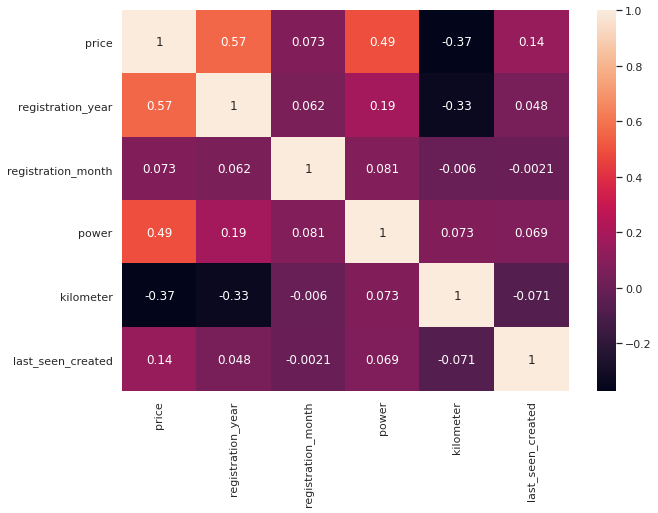

In [691]:
# Проверим корреляцию между количественными переменными
numeric_features = ['price', 'registration_year', 'registration_month', 'power', 'kilometer', 'last_seen_created']
sns.heatmap(cars[numeric_features].corr(), annot=True)

* Новая переменная `last_seen_created` очень слабо положительно коррелируют с ценой, но не коррелирует с другими фичами.

In [692]:
# Посмотрим на итоговую таблицу
cars.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,last_seen_created
0,480,sedan,1993,manual,0,golf,150000,1,petrol,volkswagen,no,14
1,18300,coupe,2011,manual,190,a5,125000,5,gasoline,audi,yes,14
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no,23
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,1
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,6


In [693]:
cars.shape

(312297, 12)

**Вывод**
* Создана таблица `cars`, которая содержит 289554 строк и 11 столбцов.
* В таблице есть 4 количественных признаков и 6 качественных признаков без порядкового значения.

*Изменения в таблице*

* Удалено 4 дубликата.
* Удалена колонка `Number_Of_Pictures` и `Postal_Index`, `Registration_Month`, т.к. не содержали полезной информации о пользователях, либо не было ясно как их кодировать для модели.

* Названия колонок вставлены разделители.
* Созданы новые колонки по количеству пользовательских дней на сайте.
* a) `last_seen_created` - количество дней между последней активностью на сайте и созданием анкеты

* Оригинальные три колонки с датами по сайту (`Date_Crawled`, `Date_Created`, `Last_Seen`) были удалены.
* В названиях категорий качественных переменных не обнаружено дубликатов.



*Пропуски*

* В таблице были пропуски от 5% до 20% пропусков.
* Пропуски были заменены для `Vehicle_Type`, `Gearbox`,`Fuel_Type` по значением самой популярной модели/бренда, года регистрации. 
* Оставшиеся пропуски в колонках качественных переменных были удалены, т.к. могли привести к искажениям в данных.


**Таким образом:**
* Данные подготовлены для обучения моделей. Для моделей из sklearn будут созданы дамми переменные и будет проведена только нормализация данных перед обучением модели, а для Light GBM и CatBoost будет проведена только нормализация данных перед обучением модели.




## Обучение моделей

### Подготовка данных перед обучением моделей

* Выделим нашу целевую переменную `price` как таргет и остальные переменные как features.

In [694]:
numeric_features = ['registration_year', 'registration_month', 'power', 'kilometer', 'last_seen_created']
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

In [695]:
target = cars['price']
features = cars.drop('price', axis=1)

### Обучение моделей

#### Линейная регрессия

In [300]:
# Pipeline 
numeric_transformer = Pipeline(
    steps=[ ("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop="first")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [301]:
%%time

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)




lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

# Проведем тестирование линейной регрессии

cross_val_score(lr, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error').mean()

CPU times: user 1min 2s, sys: 1min 18s, total: 2min 21s
Wall time: 2min 22s


-2513.7729510514287

* Ошибка предсказания не выходит за пределы межквартильного разброса таргетной величины, тем не менее, разброс в ±2509 евро довольно большой.

#### Случайный лес

* Проведем выбор гиперпараметров для случайного леса на основании `Optuna`

In [305]:
def objective_rf(trial):
  
    
    criterion = trial.suggest_categorical('criterion', ['mse'])
    max_depth = trial.suggest_int('max_depth', 1, 20)
    n_estimators =  trial.suggest_int('n_estimators', 20, 100)
    
    rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(criterion = criterion,
                                 max_depth = max_depth, 
                                 n_estimators = n_estimators,
                                 n_jobs=-1, verbose=10))])
    

    
    
    #regr.fit(X_train, y_train)
    #y_pred = regr.predict(X_val)
    #return r2_score(y_val, y_pred)
    
    score = cross_val_score(rf, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error")
    rmse = score.mean()

    return rmse


In [306]:
%%time
#Execute optuna and set hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective_rf, n_trials=1)



[I 2022-06-01 22:39:40,364] A new study created in memory with name: no-name-bce58844-0a93-4c39-bb99-069ea59f51e5
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 83


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


building tree 2 of 83
building tree 3 of 83
building tree 4 of 83
building tree 5 of 83
building tree 6 of 83
building tree 7 of 83
building tree 8 of 83
building tree 9 of 83
building tree 10 of 83
building tree 11 of 83
building tree 12 of 83
building tree 13 of 83
building tree 14 of 83
building tree 15 of 83
building tree 16 of 83
building tree 17 of 83
building tree 18 of 83
building tree 19 of 83
building tree 20 of 83
building tree 21 of 83
building tree 22 of 83
building tree 23 of 83
building tree 24 of 83
building tree 25 of 83
building tree 26 of 83
building tree 27 of 83
building tree 28 of 83
building tree 29 of 83
building tree 30 of 83
building tree 31 of 83
building tree 32 of 83
building tree 33 of 83
building tree 34 of 83
building tree 35 of 83
building tree 36 of 83
building tree 37 of 83
building tree 38 of 83
building tree 39 of 83
building tree 40 of 83
building tree 41 of 83
building tree 42 of 83
building tree 43 of 83
building tree 44 of 83
building tree 45 of

[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 83


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 83
building tree 3 of 83
building tree 4 of 83
building tree 5 of 83
building tree 6 of 83
building tree 7 of 83
building tree 8 of 83
building tree 9 of 83
building tree 10 of 83
building tree 11 of 83
building tree 12 of 83
building tree 13 of 83
building tree 14 of 83
building tree 15 of 83
building tree 16 of 83
building tree 17 of 83
building tree 18 of 83
building tree 19 of 83
building tree 20 of 83
building tree 21 of 83
building tree 22 of 83
building tree 23 of 83
building tree 24 of 83
building tree 25 of 83
building tree 26 of 83
building tree 27 of 83
building tree 28 of 83
building tree 29 of 83
building tree 30 of 83
building tree 31 of 83
building tree 32 of 83
building tree 33 of 83
building tree 34 of 83
building tree 35 of 83
building tree 36 of 83
building tree 37 of 83
building tree 38 of 83
building tree 39 of 83
building tree 40 of 83
building tree 41 of 83
building tree 42 of 83
building tree 43 of 83
building tree 44 of 83
building tree 45 of

[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 83


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


building tree 2 of 83
building tree 3 of 83
building tree 4 of 83
building tree 5 of 83
building tree 6 of 83
building tree 7 of 83
building tree 8 of 83
building tree 9 of 83
building tree 10 of 83
building tree 11 of 83
building tree 12 of 83
building tree 13 of 83
building tree 14 of 83
building tree 15 of 83
building tree 16 of 83
building tree 17 of 83
building tree 18 of 83
building tree 19 of 83
building tree 20 of 83
building tree 21 of 83
building tree 22 of 83
building tree 23 of 83
building tree 24 of 83
building tree 25 of 83
building tree 26 of 83
building tree 27 of 83
building tree 28 of 83
building tree 29 of 83
building tree 30 of 83
building tree 31 of 83
building tree 32 of 83
building tree 33 of 83
building tree 34 of 83
building tree 35 of 83
building tree 36 of 83
building tree 37 of 83
building tree 38 of 83
building tree 39 of 83
building tree 40 of 83
building tree 41 of 83
building tree 42 of 83
building tree 43 of 83
building tree 44 of 83
building tree 45 of

[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    0.5s finished
[I 2022-06-01 22:50:15,184] Trial 0 finished with value: -1732.17676284485 and parameters: {'criterion': 'mse', 'max_depth': 12, 'n_estimators': 83}. Best is trial 0 with value: -1732.17676284485.


CPU times: user 10min 28s, sys: 0 ns, total: 10min 28s
Wall time: 10min 34s


In [307]:
# Выведем результат
best_params_rf = study.best_params
best_value_rf = study.best_value
print(best_params_rf)
print(best_value_rf)

{'criterion': 'mse', 'max_depth': 12, 'n_estimators': 83}
-1732.17676284485


* Модель Случайного Леса показывает ошибку rmse 1732.18 евро, что ниже, чем у Линейной регрессии.

#### LightGBM 

* Проведем тестирование LightGBM
* Переведем формат `object` в `category`

In [544]:
features_boost = features

In [545]:
features_boost[categorical_features] = features_boost[categorical_features].astype('category')

In [546]:
X_train, X_test, y_train, y_test = train_test_split(features_boost, target, test_size=0.2, random_state=0)


In [547]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249837 entries, 140787 to 346915
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   vehicle_type        249837 non-null  category
 1   registration_year   249837 non-null  int64   
 2   gearbox             249837 non-null  category
 3   power               249837 non-null  int64   
 4   model               249837 non-null  category
 5   kilometer           249837 non-null  int64   
 6   registration_month  249837 non-null  int64   
 7   fuel_type           249837 non-null  category
 8   brand               249837 non-null  category
 9   not_repaired        249837 non-null  category
 10  last_seen_created   249837 non-null  int64   
dtypes: category(6), int64(5)
memory usage: 13.1 MB


In [548]:
# Создадим список индексов категориальных переменных 
cat_idx = [features.columns.get_loc(col) for col in categorical_features]
cat_idx

[0, 2, 4, 7, 8, 9]

In [567]:
# Проведем оценку LGBMRegressor по RandomizedSearchCV
param_grid = { "boosting_type": ["gbdt"],
              "learning_rate": [0.01, 0.1],
              'max_depth' : [2,22],
              'n_estimators': [20, 200],
              "metric": ['neg_root_mean_squared_error'],
              "num_iterations":  [500, 1200],
              "num_leaves": [2, 10],
              "min_child_samples": [5, 10],
              

             }


lgbm = lgb.LGBMRegressor(**param_grid, random_state=0)

lgbm_RandomGrid = RandomizedSearchCV(estimator = lgbm, 
                                   param_distributions = param_grid, 
                                   cv = 3, 
                                   verbose=10, 
                                   n_jobs = -1,
                                  scoring='neg_root_mean_squared_error')




In [568]:
lgbm.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'metric', 'num_iterations'])

In [569]:
%%time
lgbm_RandomGrid.fit(X_train, y_train, categorical_feature=cat_idx)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START boosting_type=gbdt, learning_rate=0.1, max_depth=22, metric=neg_root_mean_squared_error, min_child_samples=5, n_estimators=200, num_iterations=1200, num_leaves=2
[CV 1/3; 1/10] END boosting_type=gbdt, learning_rate=0.1, max_depth=22, metric=neg_root_mean_squared_error, min_child_samples=5, n_estimators=200, num_iterations=1200, num_leaves=2;, score=-1973.071 total time=  12.8s
[CV 2/3; 1/10] START boosting_type=gbdt, learning_rate=0.1, max_depth=22, metric=neg_root_mean_squared_error, min_child_samples=5, n_estimators=200, num_iterations=1200, num_leaves=2
[CV 2/3; 1/10] END boosting_type=gbdt, learning_rate=0.1, max_depth=22, metric=neg_root_mean_squared_error, min_child_samples=5, n_estimators=200, num_iterations=1200, num_leaves=2;, score=-1957.457 total time=  13.2s
[CV 3/3; 1/10] START boosting_type=gbdt, learning_rate=0.1, max_depth=22, metric=neg_root_mean_squared_error, min_child_samples=5, n_esti

RandomizedSearchCV(cv=3,
                   estimator=LGBMRegressor(boosting_type=['gbdt'],
                                           learning_rate=[0.01, 0.1],
                                           max_depth=[2, 22],
                                           metric=['neg_root_mean_squared_error'],
                                           min_child_samples=[5, 10],
                                           n_estimators=[20, 200],
                                           num_iterations=[500, 1200],
                                           num_leaves=[2, 10], random_state=0),
                   n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [2, 22],
                                        'metric': ['neg_root_mean_squared_error'],
                                        'min_child_samples': [5, 10],
                                        'n_estimators': [20, 200],
                                        'num_iterations': [500, 1200],
                                        'num_leaves': [2, 10]},
                   scoring='neg_root_mean_squared_error', verbose=10)

In [570]:
print(lgbm_RandomGrid.best_params_)
print(lgbm_RandomGrid.best_score_)
print(lgbm_RandomGrid.best_estimator_)


{'num_leaves': 10, 'num_iterations': 1200, 'n_estimators': 20, 'min_child_samples': 10, 'metric': 'neg_root_mean_squared_error', 'max_depth': 22, 'learning_rate': 0.01, 'boosting_type': 'gbdt'}
-1634.88307072337
LGBMRegressor(learning_rate=0.01, max_depth=22,
              metric='neg_root_mean_squared_error', min_child_samples=10,
              n_estimators=20, num_iterations=1200, num_leaves=10,
              random_state=0)


* Модель LightGBM пока показывает лучшую оценку RMSE - 1634.88 евро.
* Подберем лучшие параметры через GridSearchCV.

In [575]:
%%time
params = {
        "learning_rate": [0.01],
        "objective": ["regression"],
        "metric": ['neg_root_mean_squared_error'],
        "num_iterations":  [1150, 1250],
       "n_estimators": [20],
        "max_depth" : [20,23],
        "boosting_type": ["gbdt"],
        "num_leaves": [10],
        "min_child_samples": [10],
        "n_jobs": [-1]
    }


lgbm_Grid = GridSearchCV(lgb.LGBMRegressor(random_state=0), params,
                         scoring="neg_root_mean_squared_error", 
                         cv=3,
                        verbose=10)
lgbm_Grid.fit(X_train, y_train, categorical_feature=cat_idx)



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START boosting_type=gbdt, learning_rate=0.01, max_depth=20, metric=neg_root_mean_squared_error, min_child_samples=10, n_estimators=20, n_jobs=-1, num_iterations=1150, num_leaves=10, objective=regression
[CV 1/3; 1/4] END boosting_type=gbdt, learning_rate=0.01, max_depth=20, metric=neg_root_mean_squared_error, min_child_samples=10, n_estimators=20, n_jobs=-1, num_iterations=1150, num_leaves=10, objective=regression;, score=-1639.284 total time=  19.0s
[CV 2/3; 1/4] START boosting_type=gbdt, learning_rate=0.01, max_depth=20, metric=neg_root_mean_squared_error, min_child_samples=10, n_estimators=20, n_jobs=-1, num_iterations=1150, num_leaves=10, objective=regression
[CV 2/3; 1/4] END boosting_type=gbdt, learning_rate=0.01, max_depth=20, metric=neg_root_mean_squared_error, min_child_samples=10, n_estimators=20, n_jobs=-1, num_iterations=1150, num_leaves=10, objective=regression;, score=-1633.561 total time=  20.4s
[C

GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=0),
             param_grid={'boosting_type': ['gbdt'], 'learning_rate': [0.01],
                         'max_depth': [20, 23],
                         'metric': ['neg_root_mean_squared_error'],
                         'min_child_samples': [10], 'n_estimators': [20],
                         'n_jobs': [-1], 'num_iterations': [1150, 1250],
                         'num_leaves': [10], 'objective': ['regression']},
             scoring='neg_root_mean_squared_error', verbose=10)

In [579]:
print(lgbm_Grid.best_estimator_)
print(lgbm_Grid.best_score_)

LGBMRegressor(learning_rate=0.01, max_depth=20,
              metric='neg_root_mean_squared_error', min_child_samples=10,
              n_estimators=20, num_iterations=1250, num_leaves=10,
              objective='regression', random_state=0)
-1631.0107159884394


In [593]:
# Лучшие гиперпараметры
#trial.params

{'learning_rate': 0.06781100138961106,
 'num_iterations': 852,
 'num_leaves': 21,
 'feature_fraction': 0.4282144782492342,
 'bagging_fraction': 0.6229762788062068,
 'bagging_freq': 5,
 'min_child_samples': 17}

**Вывод**
* Light GBM быстрее обучается и точнее предсказывает, чем Случайный лес.

#### CatBoostRegressor

* Проведем поиск лучшей оценки RMSE на основании CatBoostRegressor.

In [594]:
%%time
model_cb = CatBoostRegressor()

params = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
          'iterations':[500, 1000, 1500],
          'metric_period':[10,50],
            'od_wait': [10,30],
            'od_type':['None', 'Iter']
          
          
        
         }

randomized_search_result = model_cb.randomized_search(params,
                                                   Pool(X_train, y_train, cat_features=categorical_features),
                                                   plot=True,
                                                  verbose=100,
                                                  cv=3, n_iter=2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 6374.4738926	test: 6401.6336132	best: 6401.6336132 (0)	total: 189ms	remaining: 1m 34s
10:	learn: 5034.4519930	test: 5057.9908332	best: 5057.9908332 (10)	total: 1.28s	remaining: 56.8s
20:	learn: 4095.7310664	test: 4117.2359700	best: 4117.2359700 (20)	total: 2.31s	remaining: 52.8s
30:	learn: 3448.0738214	test: 3466.0099057	best: 3466.0099057 (30)	total: 3.54s	remaining: 53.5s
40:	learn: 2991.8080537	test: 3005.6903163	best: 3005.6903163 (40)	total: 4.43s	remaining: 49.6s
50:	learn: 2688.1377620	test: 2698.6065363	best: 2698.6065363 (50)	total: 5.18s	remaining: 45.6s
60:	learn: 2475.6700020	test: 2482.3971228	best: 2482.3971228 (60)	total: 6.11s	remaining: 44s
70:	learn: 2320.5968548	test: 2322.9937276	best: 2322.9937276 (70)	total: 7.1s	remaining: 42.9s
80:	learn: 2215.9326432	test: 2215.8706274	best: 2215.8706274 (80)	total: 7.9s	remaining: 40.9s
90:	learn: 2140.4205606	test: 2138.8358972	best: 2138.8358972 (90)	total: 8.81s	remaining: 39.6s
100:	learn: 2076.6318263	test: 2073

0:	learn: 5993.8015693	test: 6021.0656091	best: 6021.0656091 (0)	total: 202ms	remaining: 1m 40s
10:	learn: 2984.4826080	test: 3000.2040881	best: 3000.2040881 (10)	total: 1.81s	remaining: 1m 20s
20:	learn: 2159.6820234	test: 2164.2284033	best: 2164.2284033 (20)	total: 3.2s	remaining: 1m 12s
30:	learn: 1921.5958776	test: 1922.3037958	best: 1922.3037958 (30)	total: 4.63s	remaining: 1m 10s
40:	learn: 1832.6614125	test: 1834.3390233	best: 1834.3390233 (40)	total: 5.9s	remaining: 1m 6s
50:	learn: 1793.4003048	test: 1794.6220488	best: 1794.6220488 (50)	total: 7.25s	remaining: 1m 3s
60:	learn: 1758.7094448	test: 1761.8270648	best: 1761.8270648 (60)	total: 8.59s	remaining: 1m 1s
70:	learn: 1734.1503228	test: 1738.4207786	best: 1738.4207786 (70)	total: 9.96s	remaining: 1m
80:	learn: 1714.6374089	test: 1722.0024247	best: 1722.0024247 (80)	total: 11.2s	remaining: 58s
90:	learn: 1696.2199067	test: 1704.8803168	best: 1704.8803168 (90)	total: 12.7s	remaining: 57.1s
100:	learn: 1682.4993784	test: 1692

50:	learn: 2688.1377620	test: 2698.6065363	best: 2698.6065363 (50)	total: 4.81s	remaining: 1m 29s
100:	learn: 2076.6318263	test: 2073.3543097	best: 2073.3543097 (100)	total: 9.21s	remaining: 1m 21s
150:	learn: 1930.4344440	test: 1924.9784962	best: 1924.9784962 (150)	total: 13.2s	remaining: 1m 14s
200:	learn: 1862.7692828	test: 1858.0685005	best: 1858.0685005 (200)	total: 17.7s	remaining: 1m 10s
250:	learn: 1826.2133993	test: 1821.9027370	best: 1821.9027370 (250)	total: 22.2s	remaining: 1m 6s
300:	learn: 1798.4074705	test: 1795.3246874	best: 1795.3246874 (300)	total: 26.8s	remaining: 1m 2s
350:	learn: 1775.0253307	test: 1773.2826731	best: 1773.2826731 (350)	total: 31.4s	remaining: 58s
400:	learn: 1754.6519510	test: 1754.7812466	best: 1754.7812466 (400)	total: 36.1s	remaining: 53.9s
450:	learn: 1737.1735578	test: 1739.3977357	best: 1739.3977357 (450)	total: 40.5s	remaining: 49.4s
500:	learn: 1722.0015378	test: 1725.8703333	best: 1725.8703333 (500)	total: 45s	remaining: 44.8s
550:	learn: 

In [596]:
model_cb.get_best_score()

{'learn': {'RMSE': 1155.2219640354363}}

In [597]:
# Лучшие гиперпараметры
model_cb.get_params()

{'loss_function': 'RMSE',
 'metric_period': 10,
 'depth': 10,
 'od_wait': 10,
 'iterations': 1500,
 'learning_rate': 0.1,
 'od_type': 'None'}

* `CatBooost` показывает самую точную оценку 1499.66 евро.

#### Вывод

* Проведено тестирование на валидационной выборке моделей из 4 классов моделей и каждая, кроме линейной регрессии, была протестирована с изменением нескольких гиперпараметров. Дополнитильно фиксировалось время обучения моделей и время предсказания.
* По итогам тестирования лучшей моделью является модель из класса `CatBoostRegressor`, однако время её обучения и составило 40 минут. В то время, как самой быстрой по скорости обучения и предсказания является модель `LGBM`.
* Таким образом, остановливаем поиск на модели `CatBoostRegressor` с ошибкой ± 1499.66 евро.

## Анализ моделей

* Проведем тестирование лучшей модели на тестовой выборке.

In [599]:
# Инициируем модель CatBoostRegressor с лучшими параметрами
model_cb_final = CatBoostRegressor(**model_cb.get_params(), 
                             eval_metric='RMSE',
                             random_state=0,
                             use_best_model=True
                            )

In [600]:
%%time
# Обучим модель
model_cb_final.fit(
    X_train, y_train,
    cat_features=categorical_features,
    eval_set=(X_test, y_test),
    logging_level='Verbose',  
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4212.3978306	test: 4227.1110167	best: 4227.1110167 (0)	total: 482ms	remaining: 12m 1s
10:	learn: 2410.8243962	test: 2425.2430644	best: 2425.2430644 (10)	total: 4.34s	remaining: 9m 47s
20:	learn: 1905.5299088	test: 1916.5000754	best: 1916.5000754 (20)	total: 7.92s	remaining: 9m 17s
30:	learn: 1749.2891979	test: 1761.5653854	best: 1761.5653854 (30)	total: 11.7s	remaining: 9m 15s
40:	learn: 1679.6402926	test: 1695.8213796	best: 1695.8213796 (40)	total: 15.5s	remaining: 9m 12s
50:	learn: 1637.8458840	test: 1657.0161063	best: 1657.0161063 (50)	total: 18.8s	remaining: 8m 55s
60:	learn: 1610.1957025	test: 1633.9345742	best: 1633.9345742 (60)	total: 22.4s	remaining: 8m 47s
70:	learn: 1585.1814972	test: 1612.4688951	best: 1612.4688951 (70)	total: 25.8s	remaining: 8m 39s
80:	learn: 1565.6436310	test: 1596.8312890	best: 1596.8312890 (80)	total: 29.4s	remaining: 8m 34s
90:	learn: 1548.0924112	test: 1583.6131107	best: 1583.6131107 (90)	total: 32.6s	remaining: 8m 25s
100:	learn: 1533.62159

* Время обучения 9 минут 24 секунд.

In [603]:
%%time
# Предсказание и оценка
preds_cb_final = model_cb_final.predict(X_test)
rmse_cb = mean_squared_error(y_test, preds_cb_final) ** 0.5
print(f'Предсказание RMSE: ± {round(rmse_cb, 2)} евро)')

Предсказание RMSE: ± 1446.02 евро)
CPU times: user 1.14 s, sys: 740 µs, total: 1.14 s
Wall time: 1.14 s


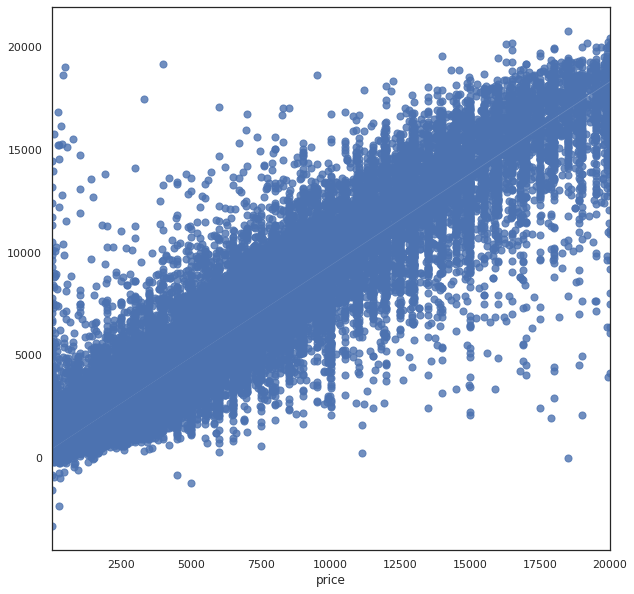

In [605]:
# Построим график предсказания
plt.figure(figsize=(10,10))
sns.regplot(y_test, preds_cb_final, fit_reg=True, scatter_kws={"s": 50})

plt.show()

* Видны выбросы, однако большая часть данных находится в нужном диапазоне. 

* Проведем сравнение лучшей модели с Пустой моделью.

In [606]:
%%time
#Получим качество оценки предсказания Dummy модели
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
dummy = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DummyRegressor())])
dummy.fit(X_train, y_train)
 
dummy_predict = dummy.predict(X_test)
result = (mean_squared_error(y_test, dummy_predict))**0.5
print(f'RMSE для Dummy регрессии: {result.round(4)} евро')


RMSE для Dummy регрессии: 4568.2855 евро
CPU times: user 535 ms, sys: 8.11 ms, total: 543 ms
Wall time: 542 ms


* Дамми модель предсказывает в три раза хуже, чем `CatBoost`.

## Вывод

* Проведена предобработка исторических данных для сервиса по продаже автомобилей с пробегом «Не бит, не крашен».
* В целом, разброс цен в базе составляет от 1 до 20 тыс евро. 
* Были удалены аномалии и заполнены пропуски, к которым чувствительно предсказание модели машинного обучения.
* Проведено сравнение 4 классов моделей машиного обучения.
* Самая лучшая оценка предсказания была у модели `CatBoostRegressor`, время её обучения составило почти 10 минут, оценка предсказания по `RMSE`, составила ± 1446.02 евро. 